<a href="https://colab.research.google.com/github/schillgc/Python/blob/master/%22Jupyter%20Notebook%22/%22Louisville%20Metro%20Government%22/%22Hours%20Not%20Worked%22/LouisvilleMetroGovernmentHoursNotWorked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<header>
      <h1><title>Louisville Metro Government Hours Not Worked</title></h1>
      <h2>Machine Learning Forecasting Based On Time-Series XLSX Data</h2>
            <cite>Gavin Schilling Marketing</cite> 
            <small>(c) 2019</small>
</header>

## Data

### Data Upload

In [45]:
import pandas as pd
from openpyxl import load_workbook
from google.colab import files
import openpyxl, pprint

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # read in XLSX file data
  wb = openpyxl.load_workbook(fn)
  sheet = wb['Data']

  df = pd.read_excel(fn, sheet_name='Data')

Saving Hours Not Worked and Hours Lost Analysis Data_1.xlsx to Hours Not Worked and Hours Lost Analysis Data_1.xlsx
User uploaded file "Hours Not Worked and Hours Lost Analysis Data_1.xlsx" with length 934982 bytes


### Data Review

In [46]:
# look at data
display(df.head())

# look at shape of data
display(df.shape)

# look at data types. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].dtypes)

# see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].isnull().any())

# display descriptive statistics
display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

,DEPT,BIWEEKLY_PAY_PERIOD_END_DATE,PARETO_TYPE,TOTAL_HOURS,TOTAL EMPLOYEE,TOTAL AVAL HOURS,LOST WORKTIME RATE
0,Belle of Louisville,2012-11-24,SICK,74.5,30,2186,0.034080
1,Belle of Louisville,2012-12-08,SICK,33.6,31,2266,0.014827
2,Belle of Louisville,2012-12-22,SICK,37.8,28,2026,0.018657
3,Belle of Louisville,2013-01-05,FURLOUGH,40.0,28,2026,0.019743
4,Belle of Louisville,2013-01-05,SICK,62.5,28,2026,0.030848


(18382, 7)

DEPT                                    object
BIWEEKLY_PAY_PERIOD_END_DATE    datetime64[ns]
PARETO_TYPE                             object
TOTAL_HOURS                            float64
TOTAL EMPLOYEE                           int64
dtype: object

DEPT                            False
BIWEEKLY_PAY_PERIOD_END_DATE    False
PARETO_TYPE                     False
TOTAL_HOURS                     False
TOTAL EMPLOYEE                  False
dtype: bool

,TOTAL_HOURS,TOTAL EMPLOYEE,TOTAL AVAL HOURS,LOST WORKTIME RATE
count,18382.000000,18382.000000,18382.000000,18382.000000
mean,202.239940,317.121369,25701.465129,0.011164
std,327.367646,381.360493,30824.023985,0.015092
min,-48.000000,1.000000,50.000000,-0.037500
25%,26.000000,111.000000,8480.000000,0.002287
50%,80.000000,201.000000,15760.000000,0.006701
75%,224.000000,430.000000,34242.000000,0.016257
85%,372.500000,500.000000,42480.000000,0.022026
95%,858.670000,1546.000000,122040.000000,0.032293
99%,1664.330000,1594.000000,125840.000000,0.057462


## Methods

### Packages & Libraries

In [2]:
!pip install pystan
!pip install fbprophet
from fbprophet import Prophet
import datetime
from datetime import datetime

## Analysis

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


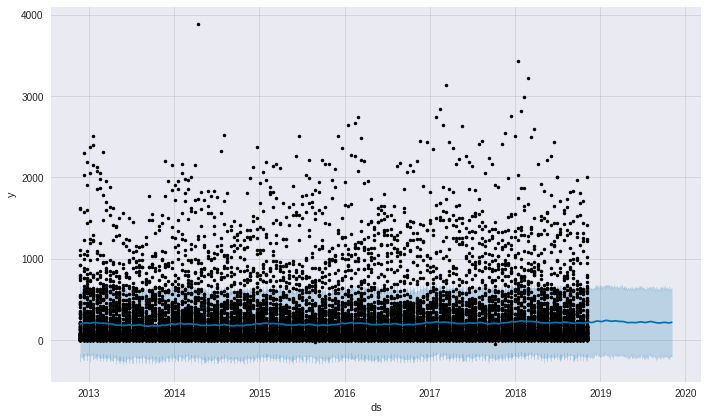

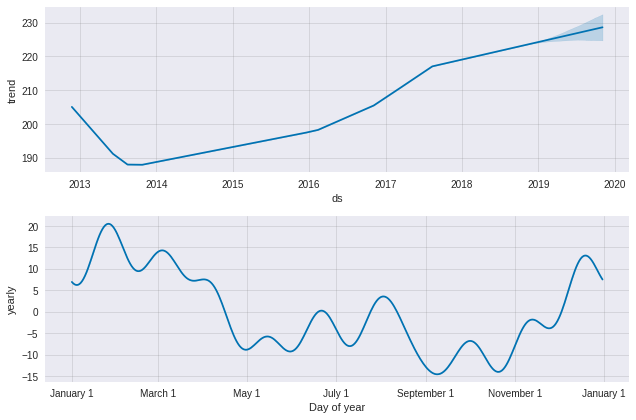

In [49]:
m = Prophet()
df = df.rename(columns = {'BIWEEKLY_PAY_PERIOD_END_DATE': 'ds', 'TOTAL_HOURS': 'y'}) # rename columns
m.fit(df)

future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)